In [ ]:
pip install -q tflite-model-maker

     |████████████████████████████████| 593kB 8.3MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 645kB 17.8MB/s 
     |████████████████████████████████| 92kB 11.9MB/s 
     |████████████████████████████████| 6.3MB 31.4MB/s 
     |████████████████████████████████| 174kB 56.1MB/s 
     |████████████████████████████████| 686kB 44.2MB/s 
     |████████████████████████████████| 849kB 51.0MB/s 
     |████████████████████████████████| 112kB 57.1MB/s 
     |████████████████████████████████| 122kB 52.3MB/s 
     |████████████████████████████████| 1.2MB 51.9MB/s 
     |████████████████████████████████| 1.1MB 47.0MB/s 
     |████████████████████████████████| 358kB 41.1MB/s 
     |████████████████████████████████| 102kB 13.9MB/s 
     |████████████████████████████████| 38.2MB 78kB/s 
     |████████████████████████████████| 194kB 49.8MB/s 


In [ ]:
#!pip install tensorflow_hub

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker.image_classifier import ModelSpec

import matplotlib.pyplot as plt

In [ ]:
#mount google drive to store the notebook, output, etc.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path to image dataset 
#image_path = '/content/drive/MyDrive/Squirrel_Training'
image_path = '/content/drive/MyDrive/Bird_Images'
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/models/Bird_Models'

In [ ]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 2291, num_label: 16, labels: Black-capped Chickadee, Black-eyed Junco, Blue Jay, Cardinal, Downy Woodpecker, Goldfinch, Grackle, House Finch, Northern Flicker, Nothing, Nuthatch, Pine Siskin, Red-bellied Woodpecker, Sparrow, Titmouse, Wren.


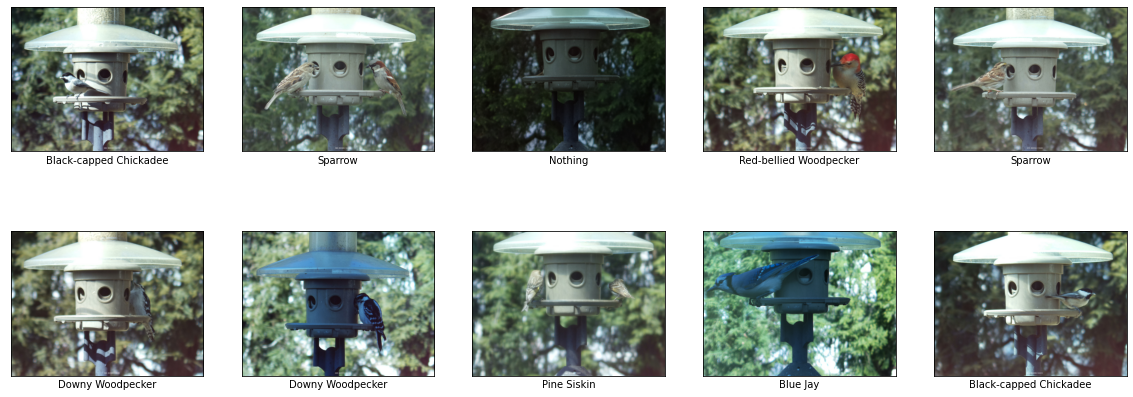

In [ ]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_data.gen_dataset().unbatch().take(10)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
spec = ModelSpec(
    uri='https://tfhub.dev/tensorflow/efficientnet/lite0/classification/2')
#spec.input_image_shape = [224, 224]

In [ ]:
model = image_classifier.create(train_data,model_spec = spec, learning_rate = 0.01, epochs=8, use_augmentation=False, train_whole_model = False)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_8 (HubK (None, 1000)              4694024   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                16016     
Total params: 4,710,040
Trainable params: 16,016
Non-trainable params: 4,694,024
_________________________________________________________________
None
Epoch 1/8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


64/64 [==============================] - 220s 3s/step - loss: 2.9960 - accuracy: 0.3916
Epoch 2/8
64/64 [==============================] - 219s 3s/step - loss: 1.9951 - accuracy: 0.6079
Epoch 3/8
64/64 [==============================] - 219s 3s/step - loss: 1.7300 - accuracy: 0.6621
Epoch 4/8
64/64 [==============================] - 218s 3s/step - loss: 1.8107 - accuracy: 0.6738
Epoch 5/8
64/64 [==============================] - 219s 3s/step - loss: 1.7119 - accuracy: 0.6978
Epoch 6/8
64/64 [==============================] - 218s 3s/step - loss: 1.6821 - accuracy: 0.7070
Epoch 7/8
64/64 [==============================] - 220s 3s/step - loss: 1.6094 - accuracy: 0.7144
Epoch 8/8
64/64 [==============================] - 220s 3s/step - loss: 1.5198 - accuracy: 0.7441


In [ ]:
loss, accuracy = model.evaluate(test_data) 

8/8 [==============================] - 47s 3s/step - loss: 1.5807 - accuracy: 0.6913


In [ ]:
#config = QuantizationConfig.for_int8(representative_data=test_data)
#loss, accuracy = model.evaluate(test_data) 

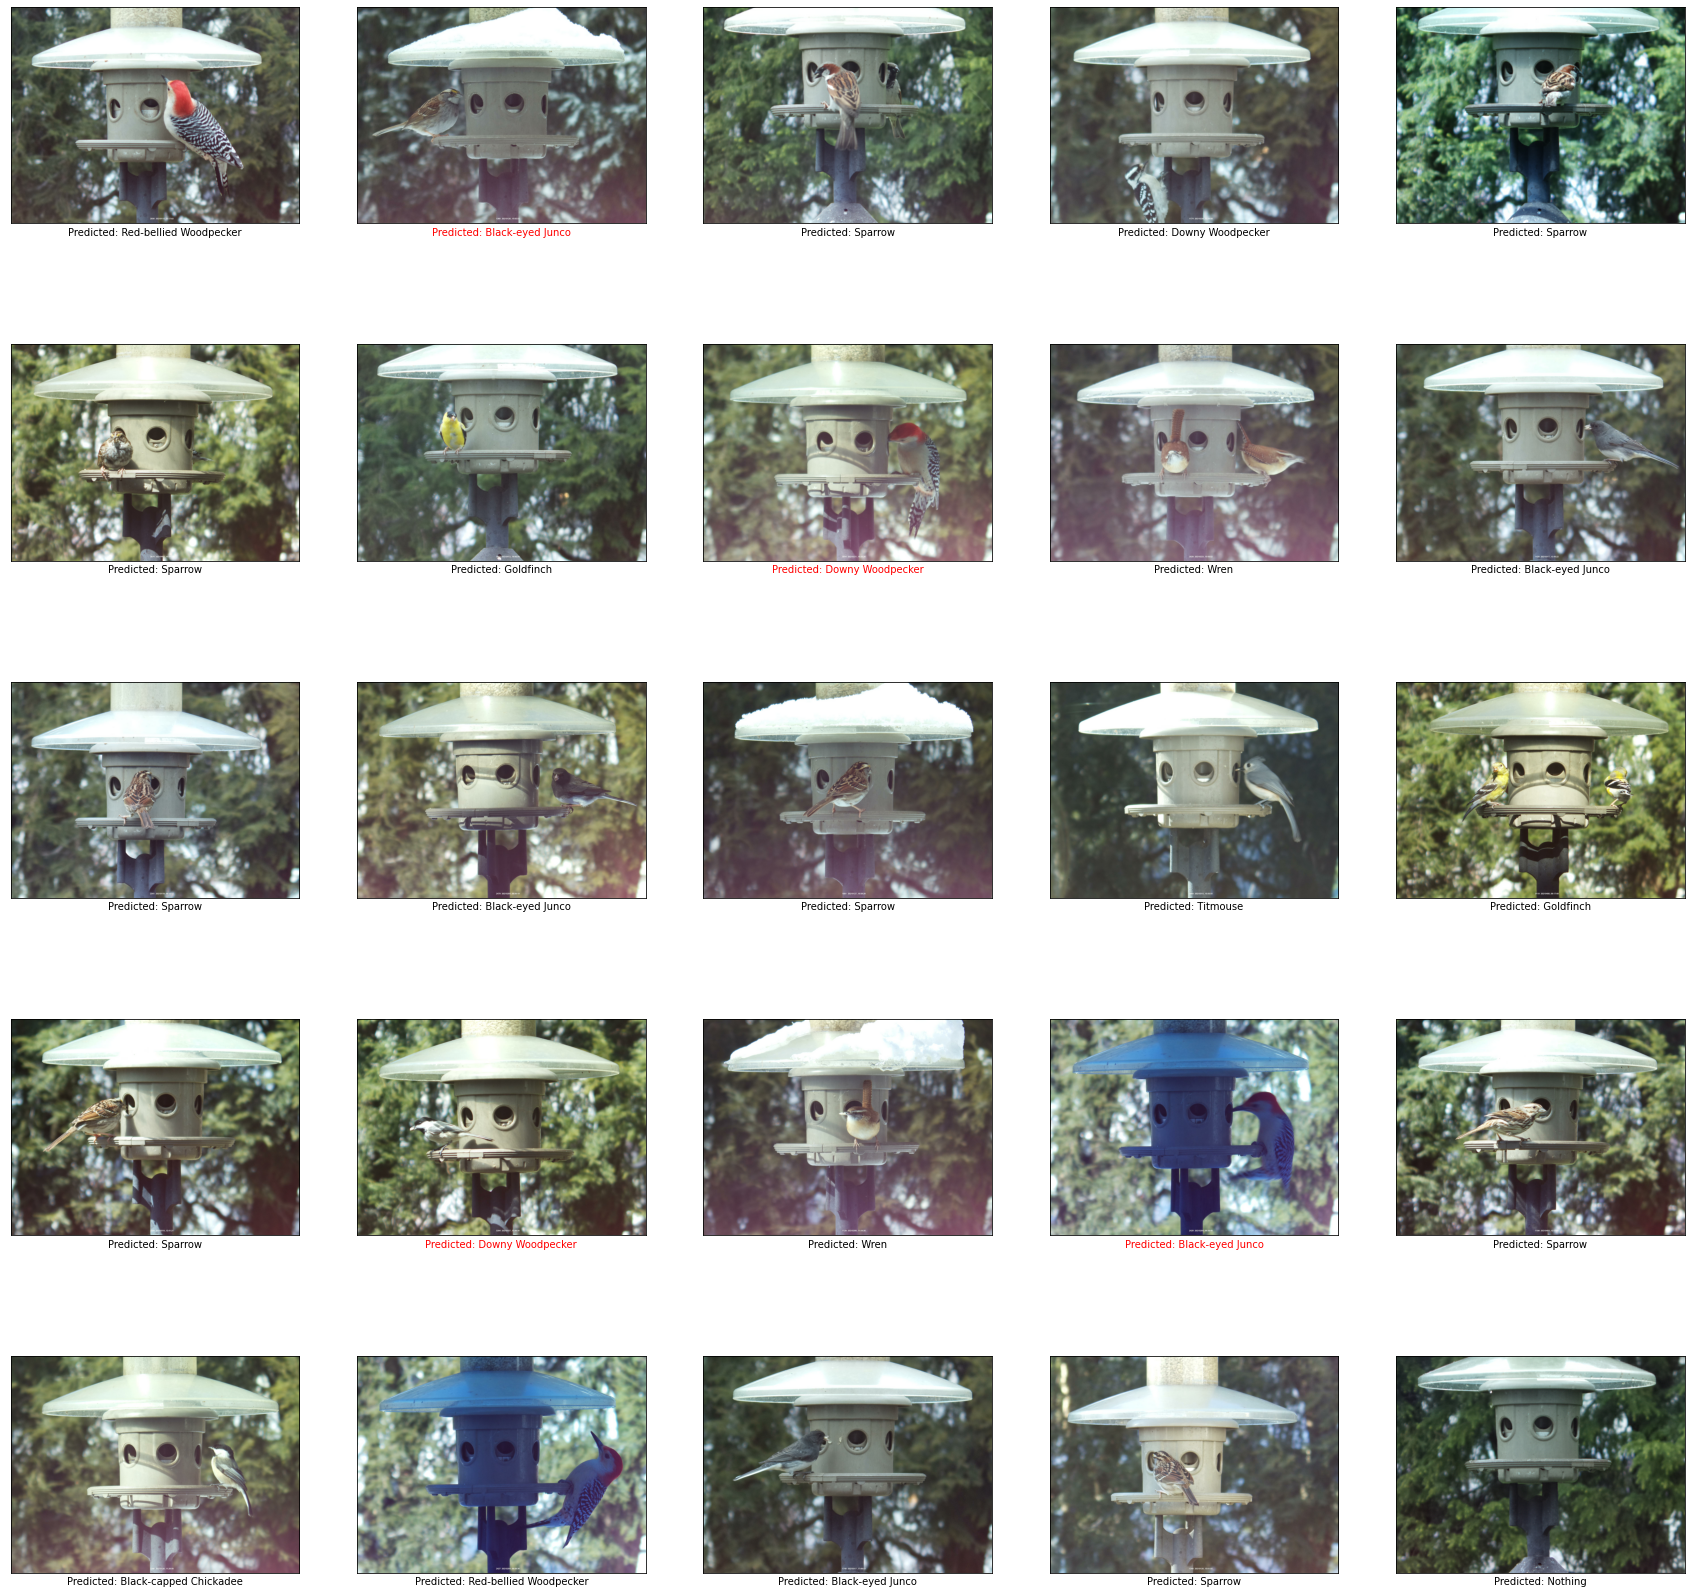

In [ ]:
# https://www.tensorflow.org/lite/tutorials/model_maker_image_classification
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 25 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(30, 30))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(25)):
  ax = plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

It got several wrong, but it's not too bad. But the results aren't as good as I got with a fast.ai model (which won't run on the Pi). So there's a trade-off here between accuracy and the ability to run it on the edge.

In [ ]:
export_path = '/content/drive/MyDrive/Colab Notebooks/models/Bird_Models'

In [ ]:
model.export(export_dir=export_path, with_metadata=False, tflite_filename='model.tflite')

INFO:tensorflow:Assets written to: /tmp/tmp35bz8c5m/assets


INFO:tensorflow:Assets written to: /tmp/tmp35bz8c5m/assets


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/model.tflite


INFO:tensorflow:Saving labels in /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/labels.txt


INFO:tensorflow:Saving labels in /content/drive/MyDrive/Colab Notebooks/models/Bird_Models/labels.txt


In [ ]:
#%env TFLITE_FILE=model_tpu.tflite

In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler	

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2537  100  2537    0     0   130k      0 --:--:-- --:--:-- --:--:--  130k
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.laun

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/models/Bird_Models'
%pwd

/content/drive/MyDrive/Colab Notebooks/models/Bird_Models


'/content/drive/MyDrive/Colab Notebooks/models/Bird_Models'

In [ ]:
! edgetpu_compiler model.tflite

Edge TPU Compiler version 15.0.340273435

Model compiled successfully in 1046 ms.

Input model: model.tflite
Input size: 5.06MiB
Output model: model_edgetpu.tflite
Output size: 5.49MiB
On-chip memory used for caching model parameters: 5.38MiB
On-chip memory remaining for caching model parameters: 1.50MiB
Off-chip memory used for streaming uncached model parameters: 128.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 66
Operation log: model_edgetpu.log
See the operation log file for individual operation details.


In [ ]:
%ls -l

total 23870
-rw------- 1 root root      195 Jun 14 00:41 labels.txt
-rw------- 1 root root      629 Jun 14 00:42 model_edgetpu.log
-rw------- 1 root root      151 Jun 13 21:21 model_edgetpu.log.gdoc
-rw------- 1 root root  5755416 Jun 14 00:42 model_edgetpu.tflite
-rw------- 1 root root 13375544 Jun 13 15:19 model_quant.tflite
-rw------- 1 root root  5308512 Jun 14 00:41 model.tflite
